# Lens free imaging dataset

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [3]:
path_features = 'C:\\Belgium test Project\\Rerun Dataset\\Features\\features.csv'
path_features_MAT = 'C:\\Belgium test Project\\Features from MATLAB\\post_pro_input.csv'
path_spy_label = 'C:\\Belgium test Project\\Rerun Dataset\\Label\\Label.csv'

In [4]:
features = pd.read_csv(path_features)
py_label = pd.read_csv(path_spy_label)
input_py = features.merge(py_label,left_index = True,right_index=True)

input_MAT = pd.read_csv(path_features_MAT)
Lab_MAT = input_MAT['Label'].to_numpy()
Class = []
for l in range(len(Lab_MAT)):
    if Lab_MAT[l] == 1:
        Class.append('Mitosis')
    if Lab_MAT[l] == 0:
        Class.append('Normal')
pd_class = pd.DataFrame({'Class':Class})

mod_input_MAT = input_MAT.merge(pd_class,left_index = True,right_index=True)

In [5]:
features_PY = features.to_numpy()
Label_PY = py_label['Label'].to_numpy()

In [6]:
features_train_s, features_test_s, Label_train_s, Label_test_s = train_test_split(features_PY, Label_PY,
                                                                          test_size=0.25, shuffle=True)

In [7]:
parameters = {'criterion':('gini','entropy'), 'max_depth':list(range(5,30))}
forest = RandomForestClassifier()
clf = GridSearchCV(forest,parameters)
clf.fit(features_train_s,Label_train_s)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                       26, 27, 28, 29]})

In [8]:
clf.cv_results_['mean_test_score'].max()

0.9469387755102041

In [9]:
clf.best_estimator_

RandomForestClassifier(max_depth=6)

In [10]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [11]:
pred = clf.predict(features_test_s)
cm = confusion_matrix(Label_test_s, pred)

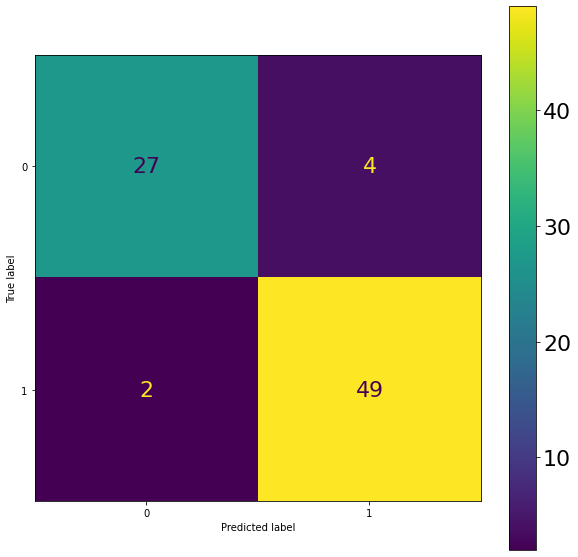

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 22})
cm_display = ConfusionMatrixDisplay(cm).plot(ax = ax)

In [13]:
precision = cm[1,1]/(cm[0,1] + cm[1,1])
accuracy = (cm[1,1] + cm[0,0])/np.sum(cm)
recall = cm[1,1]/(cm[1,0] + cm[1,1])

print('Accuracy is {acc:.2f}%, precision is {pre:.2f}% and recall is {rec:.2f}%.'.format(acc = accuracy*100,pre = precision*100,rec = recall*100))

Accuracy is 92.68%, precision is 92.45% and recall is 96.08%.


In [14]:
Tree = DecisionTreeClassifier()
clf_tree = GridSearchCV(Tree,parameters)
clf_tree.fit(features_PY,Label_PY)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                       26, 27, 28, 29]})

In [15]:
clf_tree.cv_results_['mean_test_score'].max()

0.898927738927739

In [16]:
clf_tree.best_estimator_

DecisionTreeClassifier(max_depth=29)